# <center> Lab 8: </center>
- Yousef Ibrahim Gomaa Mahmoud
- ID: 320210207
- Section: AID 3
- Group: 1

In [243]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [244]:
df = pd.read_csv("diabetes.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [245]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [246]:
df.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
609,1,111,62,13,182,24.0,0.138,23,0
555,7,124,70,33,215,25.5,0.161,37,0
15,7,100,0,0,0,30.0,0.484,32,1
425,4,184,78,39,277,37.0,0.264,31,1
21,8,99,84,0,0,35.4,0.388,50,0


In [247]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


array([[<Axes: title={'center': 'Pregnancies'}>]], dtype=object)

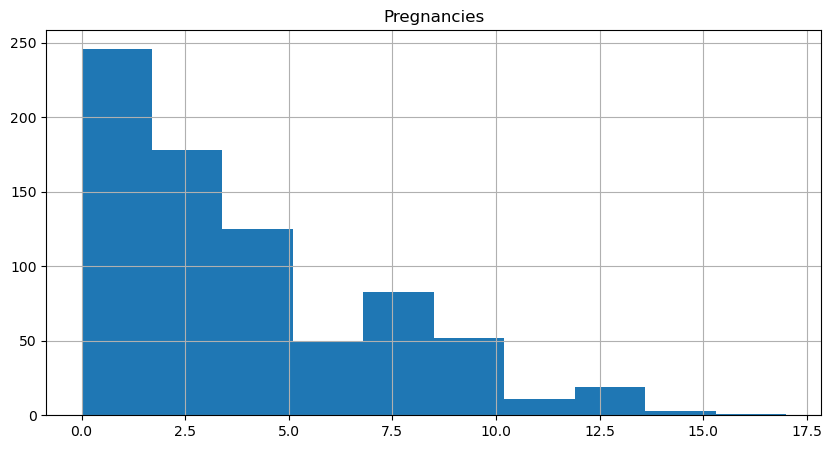

In [248]:
df[['Pregnancies']].hist(figsize=(10,5))

In [249]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [250]:
df.isnull().any(axis=1)

0      False
1      False
2      False
3      False
4      False
       ...  
763    False
764    False
765    False
766    False
767    False
Length: 768, dtype: bool

In [251]:
df['Insulin'].replace(0, round(df['Insulin'].mean(axis=0)), inplace=True)
df['BloodPressure'].replace(0, round(df['BloodPressure'].mean(axis=0)), inplace=True)
df['SkinThickness'].replace(0, round(df['SkinThickness'].mean(axis=0)), inplace=True)
df['BMI'].replace(0, round(df['BMI'].mean(axis=0)), inplace=True)
df['Glucose'].replace(0, round(df['Glucose'].mean(axis=0)), inplace=True)
df['Pregnancies'].replace(0, round(df['Pregnancies'].mean(axis=0)), inplace=True)
df['Age'].replace(0, round(df['Age'].mean(axis=0)), inplace=True)
df['DiabetesPedigreeFunction'].replace(0, df['DiabetesPedigreeFunction'].mean(axis=0), inplace=True)

In [252]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,80,33.6,0.627,50,1
1,1,85,66,29,80,26.6,0.351,31,0
2,8,183,64,21,80,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,4,137,40,35,168,43.1,2.288,33,1
5,5,116,74,21,80,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,69,21,80,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,21,80,32.0,0.232,54,1


<Axes: >

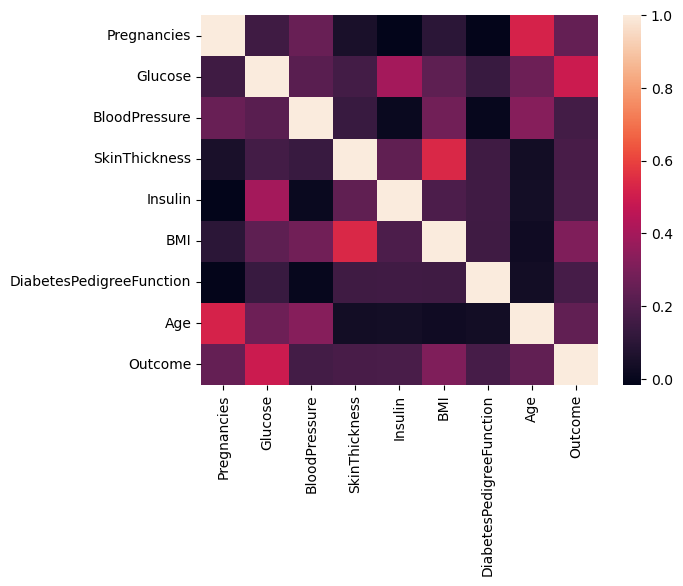

In [253]:
sns.heatmap(df.corr())

In [254]:
counts = df['Outcome'].value_counts()
prob = []
for i in range(len(counts)):
    prob.append(counts[i]/len(df))

columns = df.columns[:-1]
columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [255]:
prob = {}

def func(col_n, col_item):
    pos = len(df[(df['Outcome']==1)&(df[col_n]== col_item)])/counts[0]
    neg = len(df[(df['Outcome']==0)&(df[col_n]== col_item)])/counts[1]
    return {str(col_n)+" | "+str(col_item)+" | 1": pos, str(col_n)+" | "+str(col_item)+" | 0": neg}

for i in columns:
    items = df[i].unique()
    for j in items:
        new_prob = func(i,j)
        prob.update(new_prob)

prob

{'Pregnancies | 6 | 1': 0.032,
 'Pregnancies | 6 | 0': 0.12686567164179105,
 'Pregnancies | 1 | 1': 0.058,
 'Pregnancies | 1 | 0': 0.39552238805970147,
 'Pregnancies | 8 | 1': 0.044,
 'Pregnancies | 8 | 0': 0.05970149253731343,
 'Pregnancies | 4 | 1': 0.122,
 'Pregnancies | 4 | 0': 0.44029850746268656,
 'Pregnancies | 5 | 1': 0.042,
 'Pregnancies | 5 | 0': 0.13432835820895522,
 'Pregnancies | 3 | 1': 0.054,
 'Pregnancies | 3 | 0': 0.1791044776119403,
 'Pregnancies | 10 | 1': 0.02,
 'Pregnancies | 10 | 0': 0.05223880597014925,
 'Pregnancies | 2 | 1': 0.038,
 'Pregnancies | 2 | 0': 0.31343283582089554,
 'Pregnancies | 7 | 1': 0.05,
 'Pregnancies | 7 | 0': 0.07462686567164178,
 'Pregnancies | 9 | 1': 0.036,
 'Pregnancies | 9 | 0': 0.03731343283582089,
 'Pregnancies | 11 | 1': 0.014,
 'Pregnancies | 11 | 0': 0.014925373134328358,
 'Pregnancies | 13 | 1': 0.01,
 'Pregnancies | 13 | 0': 0.018656716417910446,
 'Pregnancies | 15 | 1': 0.002,
 'Pregnancies | 15 | 0': 0.0,
 'Pregnancies | 17 | 1

In [256]:
X = df.drop('Outcome', axis=1)
Y = df['Outcome']

In [257]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state=1)

In [258]:
classifier = GaussianNB()
classifier.fit(x_train, y_train)

GaussianNB()

In [259]:
predictions = classifier.predict(x_test)

predictions[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [260]:
accuracy = print('Accuracy Score: ', format(accuracy_score(y_test, predictions)))

Accuracy Score:  0.7705627705627706


In [263]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion='entropy', ccp_alpha=0.015)
dt.fit(x_train, y_train)
prediction = dt.predict(x_test)
accuracy = print('Accuracy Score: ', format(accuracy_score(y_test, prediction)))

Accuracy Score:  0.7662337662337663


Yousef Ibrahim Gomaa Mahmoud
320210207